In [70]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 9)})
sns.set(font_scale=1.5) 

In [71]:
df_price = pd.read_csv('data/NG-weekly.csv')
df_price.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 07, 2022",8.768,7.867,8.989,7.559,68.13K,8.73%
1,"Jul 31, 2022",8.064,7.910,8.480,7.550,446.85K,-2.01%
2,"Jul 24, 2022",8.229,8.390,9.752,8.010,240.26K,-0.84%
3,"Jul 17, 2022",8.299,7.168,8.417,7.078,457.39K,18.29%
4,"Jul 10, 2022",7.016,6.446,7.144,6.014,585.16K,16.27%


In [72]:
df_storage = pd.read_excel (r'C:\Users\39392\Desktop\Data Analytics\git\Prediction Model\data\ng-storage.xls')
df_storage.head()

,Date,Weekly Lower 48 States Natural Gas Working Underground Storage (Billion Cubic Feet)
0,2010-01-01,3117
1,2010-01-08,2850
2,2010-01-15,2607
3,2010-01-22,2521
4,2010-01-29,2406


In [73]:
df_storage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 2 columns):
 #   Column                                                                               Non-Null Count  Dtype         
---  ------                                                                               --------------  -----         
 0   Date                                                                                 658 non-null    datetime64[ns]
 1   Weekly Lower 48 States Natural Gas Working Underground Storage (Billion Cubic Feet)  658 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 10.4 KB


In [74]:
df_storage.rename(columns = {'Weekly Lower 48 States Natural Gas Working Underground Storage (Billion Cubic Feet)':'storage_bcf'}, inplace = True)
df_storage.head()

,Date,storage_bcf
0,2010-01-01,3117
1,2010-01-08,2850
2,2010-01-15,2607
3,2010-01-22,2521
4,2010-01-29,2406


In [75]:
df_storage.rename(columns = {'Date':'Report_date'}, inplace = True)
df_storage.head()

,Report_date,storage_bcf
0,2010-01-01,3117
1,2010-01-08,2850
2,2010-01-15,2607
3,2010-01-22,2521
4,2010-01-29,2406


In [76]:
df_storage.sort_values(by=["Report_date"], ascending=False, inplace = True)
df_storage.head()

,Report_date,storage_bcf
657,2022-08-05,2501
656,2022-07-29,2457
655,2022-07-22,2416
654,2022-07-15,2401
653,2022-07-08,2369


In [77]:
df_storage = df_storage.reset_index()
df_storage.head()

,index,Report_date,storage_bcf
0,657,2022-08-05,2501
1,656,2022-07-29,2457
2,655,2022-07-22,2416
3,654,2022-07-15,2401
4,653,2022-07-08,2369


In [78]:
del df_storage['index']
df_storage.head()

,Report_date,storage_bcf
0,2022-08-05,2501
1,2022-07-29,2457
2,2022-07-22,2416
3,2022-07-15,2401
4,2022-07-08,2369


In [79]:
df_price["Vol."].str.replace("K","")
df_price.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 07, 2022",8.768,7.867,8.989,7.559,68.13K,8.73%
1,"Jul 31, 2022",8.064,7.910,8.480,7.550,446.85K,-2.01%
2,"Jul 24, 2022",8.229,8.390,9.752,8.010,240.26K,-0.84%
3,"Jul 17, 2022",8.299,7.168,8.417,7.078,457.39K,18.29%
4,"Jul 10, 2022",7.016,6.446,7.144,6.014,585.16K,16.27%


In [80]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      658 non-null    object 
 1   Price     658 non-null    float64
 2   Open      658 non-null    float64
 3   High      658 non-null    float64
 4   Low       658 non-null    float64
 5   Vol.      658 non-null    object 
 6   Change %  658 non-null    object 
dtypes: float64(4), object(3)
memory usage: 36.1+ KB


In [81]:
df_price['Date']= pd.to_datetime(df_price['Date'])
df_price.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2022-08-07,8.768,7.867,8.989,7.559,68.13K,8.73%
1,2022-07-31,8.064,7.910,8.480,7.550,446.85K,-2.01%
2,2022-07-24,8.229,8.390,9.752,8.010,240.26K,-0.84%
3,2022-07-17,8.299,7.168,8.417,7.078,457.39K,18.29%
4,2022-07-10,7.016,6.446,7.144,6.014,585.16K,16.27%


In [82]:
df = pd.merge_asof(df_price.sort_values('Date'), df_storage.sort_values('Report_date'), left_on=['Date'], right_on=['Report_date'], direction="nearest")
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Report_date,storage_bcf
0,2010-01-03,5.749,5.705,6.108,5.615,555.23K,3.18%,2010-01-01,3117
1,2010-01-10,5.691,5.576,5.804,5.354,655.31K,-1.01%,2010-01-08,2850
2,2010-01-17,5.819,5.640,5.869,5.444,442.21K,2.25%,2010-01-15,2607
3,2010-01-24,5.131,5.821,5.854,5.060,356.89K,-11.82%,2010-01-22,2521
4,2010-01-31,5.515,5.247,5.598,5.227,589.69K,7.48%,2010-01-29,2406


In [83]:
new_df = df.drop(['Open','High','Low','Change %','Report_date'], axis=1)
new_df.head()


,Date,Price,Vol.,storage_bcf
0,2010-01-03,5.749,555.23K,3117
1,2010-01-10,5.691,655.31K,2850
2,2010-01-17,5.819,442.21K,2607
3,2010-01-24,5.131,356.89K,2521
4,2010-01-31,5.515,589.69K,2406


In [84]:
new_df["Vol."].unique()

array(['555.23K', '655.31K', '442.21K', '356.89K', '589.69K', '712.42K',
       '447.38K', '315.40K', '408.90K', '393.62K', '516.36K', '388.22K',
       '315.92K', '619.35K', '770.09K', '536.66K', '470.22K', '420.55K',
       '633.73K', '528.86K', '317.92K', '548.14K', '664.17K', '634.48K',
       '476.74K', '440.13K', '407.32K', '570.49K', '555.04K', '385.08K',
       '602.09K', '673.24K', '486.58K', '304.71K', '507.82K', '435.35K',
       '756.22K', '551.07K', '339.62K', '583.44K', '750.82K', '540.80K',
       '458.74K', '590.74K', '733.98K', '685.69K', '250.16K', '574.99K',
       '855.06K', '746.51K', '368.56K', '309.24K', '722.67K', '676.17K',
       '594.66K', '380.60K', '615.63K', '920.48K', '564.90K', '298.86K',
       '537.71K', '687.34K', '764.80K', '568.98K', '532.27K', '721.82K',
       '770.56K', '528.30K', '505.93K', '673.03K', '559.58K', '550.47K',
       '458.15K', '588.31K', '795.10K', '603.86K', '537.65K', '395.77K',
       '471.34K', '614.61K', '574.43K', '367.02K', 

In [85]:
new_df.rename(columns = {'Vol.':'Volume'}, inplace = True)
new_df.head()

,Date,Price,Volume,storage_bcf
0,2010-01-03,5.749,555.23K,3117
1,2010-01-10,5.691,655.31K,2850
2,2010-01-17,5.819,442.21K,2607
3,2010-01-24,5.131,356.89K,2521
4,2010-01-31,5.515,589.69K,2406


In [86]:
new_df.Volume = (new_df.Volume.replace(r'[KM]+$', '', regex=True).astype(float) * \
                 new_df.Volume.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))
#replacing K with 10*3 and M with 10*6

In [87]:
print(new_df.corr())

                Price    Volume  storage_bcf
Price        1.000000 -0.193638    -0.197227
Volume      -0.193638  1.000000     0.172358
storage_bcf -0.197227  0.172358     1.000000


Text(0.5, 1.0, 'Price')

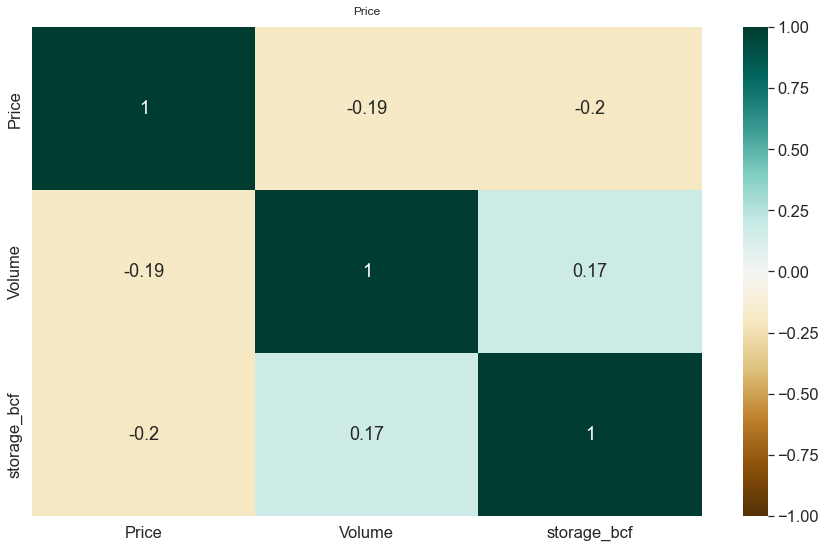

In [88]:
heatmap = sns.heatmap(new_df.corr(),vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Price', fontdict={'fontsize':12}, pad=12)

In [89]:
import statsmodels.api as sm
y = new_df['Price']
X = new_df[['storage_bcf', 'Volume']]
X = sm.add_constant(X)

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [91]:
model = sm.OLS(y_train,X_train)
results = model.fit()

In [92]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     12.69
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           4.41e-06
Time:                        12:38:53   Log-Likelihood:                -649.84
No. Observations:                 440   AIC:                             1306.
Df Residuals:                     437   BIC:                             1318.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.4255      0.217     20.378      0.000       3.999       4.852
storage_bcf    -0.0003   6.69e-05     -3.873      0.000      -0.000      -0.000
Volume      -5.663e-07   2.18e-07     -2.596      0.010   -9.95e-07   -1.38e-07
==============================================================================
Omnibus:                      141.701   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              486.849
Skew:                           1.453   Prob(JB):                    1.91e-106
Kurtosis:                       7.255   Cond. No.                     2.89e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
model = sm.OLS(y_test,X_test)
results = model.fit()

In [94]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     11.99
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           1.15e-05
Time:                        12:38:53   Log-Likelihood:                -346.72
No. Observations:                 218   AIC:                             699.4
Df Residuals:                     215   BIC:                             709.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.0532      0.358     14.120      0.000       4.348       5.759
storage_bcf    -0.0002      0.000     -2.010      0.046      -0.000   -4.34e-06
Volume      -1.569e-06   4.02e-07     -3.904      0.000   -2.36e-06   -7.77e-07
==============================================================================
Omnibus:                       60.955   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.289
Skew:                           1.315   Prob(JB):                     1.14e-29
Kurtosis:                       5.786   Cond. No.                     2.99e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
def mae(y, pred): 
    return round(np.mean(np.abs(y - pred)), 2)

In [96]:
pred_train = results.predict(X_train)

print('Naïve Training MAE:', mae(y_train, np.mean(pred_train))) #naive mae
print('Training MAE:', mae(y_train, pred_train))

Naïve Training MAE: 0.84
Training MAE: 0.81


In [97]:
pred_test = results.predict(X_test)
print('Naïve Testing MAE:', mae(y_test, np.mean(pred_test))) #naive mae
print('Testing MAE:', mae(y_test, pred_test))

Naïve Testing MAE: 0.96
Testing MAE: 0.88


In [98]:
Y = new_df['Price']
X = new_df['storage_bcf']
X = sm.add_constant(X)   # add a constant to the model
model = sm.OLS(Y,X)
results = model.fit()

In [100]:
results_as_html = results.summary().tables[1].as_html()
results_new_df = pd.read_html(results_as_html, header=0, index_col=0)[0]

intercept, slope = results_new_df['coef'][0], results_new_df['coef'][1]

In [101]:
correl = new_df.storage_bcf.corr(new_df.Price)
print('Correlation coefficient between X and Y:', round(correl, 2))

Correlation coefficient between X and Y: -0.2


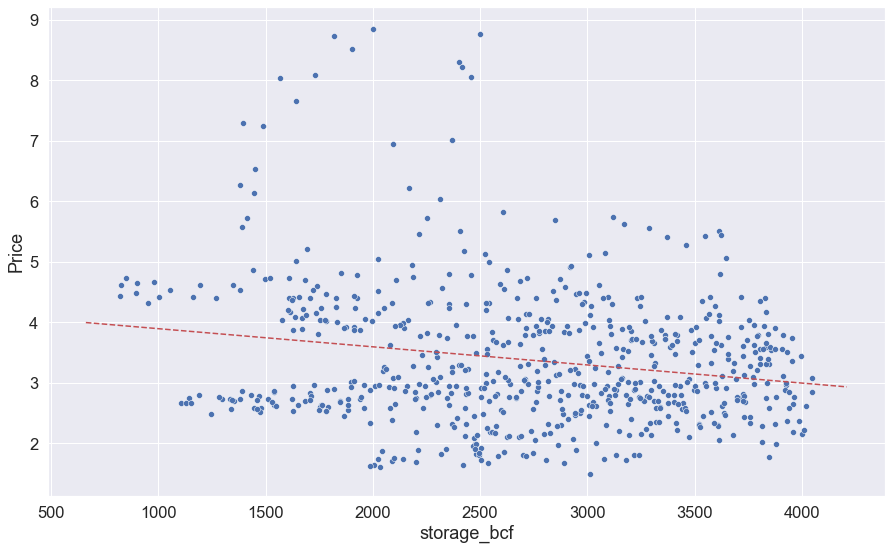

In [102]:
# plot the data points using a scatter plot
sns.scatterplot(x="storage_bcf", y="Price", data=new_df)

axes = plt.gca()   # get axes instance of current figure
x_vals = np.array(axes.get_xlim())   # get x-axis limits
y_vals = intercept + (slope * x_vals)   # define the equation of the regression line
plt.plot(x_vals, y_vals, '--', color='r')   # draw the regression line on top of the scatter plot
plt.show()

In [103]:
Y = new_df['Price']
X = new_df['Volume']
X = sm.add_constant(X)   # add a constant to the model
model = sm.OLS(Y,X)
results = model.fit()

In [104]:
results_as_html = results.summary().tables[1].as_html()
results_new_df = pd.read_html(results_as_html, header=0, index_col=0)[0]

intercept, slope = results_new_df['coef'][0], results_new_df['coef'][1]

In [105]:
correl = new_df.Volume.corr(new_df.Price)
print('Correlation coefficient between X and Y:', round(correl, 2))

Correlation coefficient between X and Y: -0.19


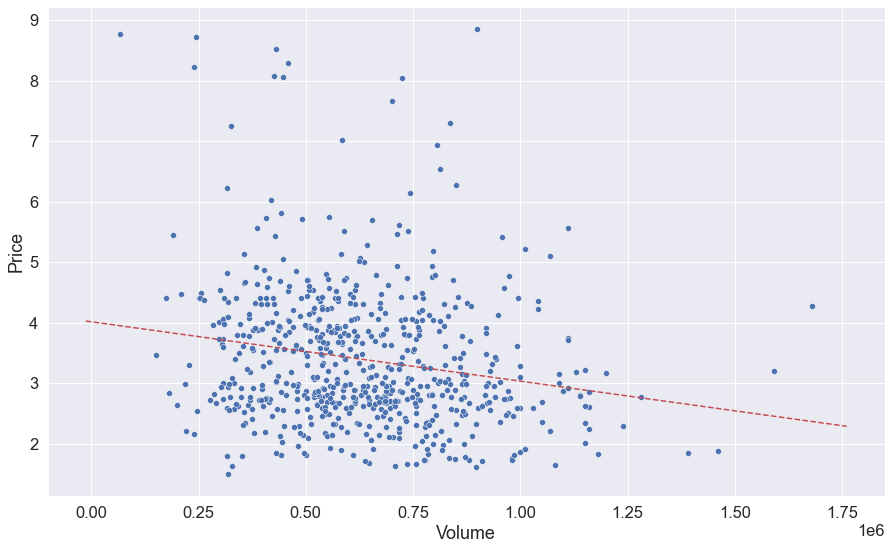

In [106]:
# plot the data points using a scatter plot
sns.scatterplot(x="Volume", y="Price", data=new_df)

axes = plt.gca()   # get axes instance of current figure
x_vals = np.array(axes.get_xlim())   # get x-axis limits
y_vals = intercept + (slope * x_vals)   # define the equation of the regression line
plt.plot(x_vals, y_vals, '--', color='r')   # draw the regression line on top of the scatter plot
plt.show()

In [107]:
from statsmodels.tsa.seasonal import STL

import matplotlib.pyplot as plt
import seaborn as sns